In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
!gdown 1qeJqFtRdjjHqExbWJcgKy0yJbczTTAE3

Downloading...
From: https://drive.google.com/uc?id=1qeJqFtRdjjHqExbWJcgKy0yJbczTTAE3
To: d:\1.Study\AIO\4.Code\AIO2024_Exercise\Module_3\M3_Week4_170924\Housing.csv

  0%|          | 0.00/30.0k [00:00<?, ?B/s]
100%|██████████| 30.0k/30.0k [00:00<00:00, 1.97MB/s]


In [3]:
import os
print(os.getcwd())


d:\1.Study\AIO\4.Code\AIO2024_Exercise\Module_3\M3_Week4_170924


In [7]:
dataset_path = '../M3_Week4_170924/Housing.csv'
df = pd.read_csv(dataset_path)

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()
print("Categorical columns:", categorical_cols)

ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(df[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical_cols, columns=categorical_cols)
numerical_df = df.drop(categorical_cols, axis=1)
encoded_df = pd.concat([numerical_df, encoded_categorical_df], axis=1)

Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [9]:
normalizer = StandardScaler()
dataset_arr = normalizer.fit_transform(encoded_df)

In [10]:
X, y = dataset_arr[:, 1:], dataset_arr[:, 0]

In [11]:
test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [12]:
def train_and_evaluate(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    
    print(f'Evaluation results for {model.__class__.__name__}:')
    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'Mean Squared Error: {mse:.4f}\n')

In [13]:
# Random Forest
rf_regressor = RandomForestRegressor(random_state=random_state)
rf_regressor.fit(X_train, y_train)

# AdaBoost
ada_regressor = AdaBoostRegressor(random_state=random_state)
ada_regressor.fit(X_train, y_train)

# Gradient Boosting
gb_regressor = GradientBoostingRegressor(random_state=random_state)
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [14]:
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    
    print(f'Evaluation results for {model.__class__.__name__}:')
    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'Mean Squared Error: {mse:.4f}\n')

In [15]:
# Đánh giá Random Forest
evaluate_model(rf_regressor, X_val, y_val)

# Đánh giá AdaBoost
evaluate_model(ada_regressor, X_val, y_val)

# Đánh giá Gradient Boosting
evaluate_model(gb_regressor, X_val, y_val)

Evaluation results for RandomForestRegressor:
Mean Absolute Error: 0.4609
Mean Squared Error: 0.3794

Evaluation results for AdaBoostRegressor:
Mean Absolute Error: 0.5677
Mean Squared Error: 0.5739

Evaluation results for GradientBoostingRegressor:
Mean Absolute Error: 0.4517
Mean Squared Error: 0.3961



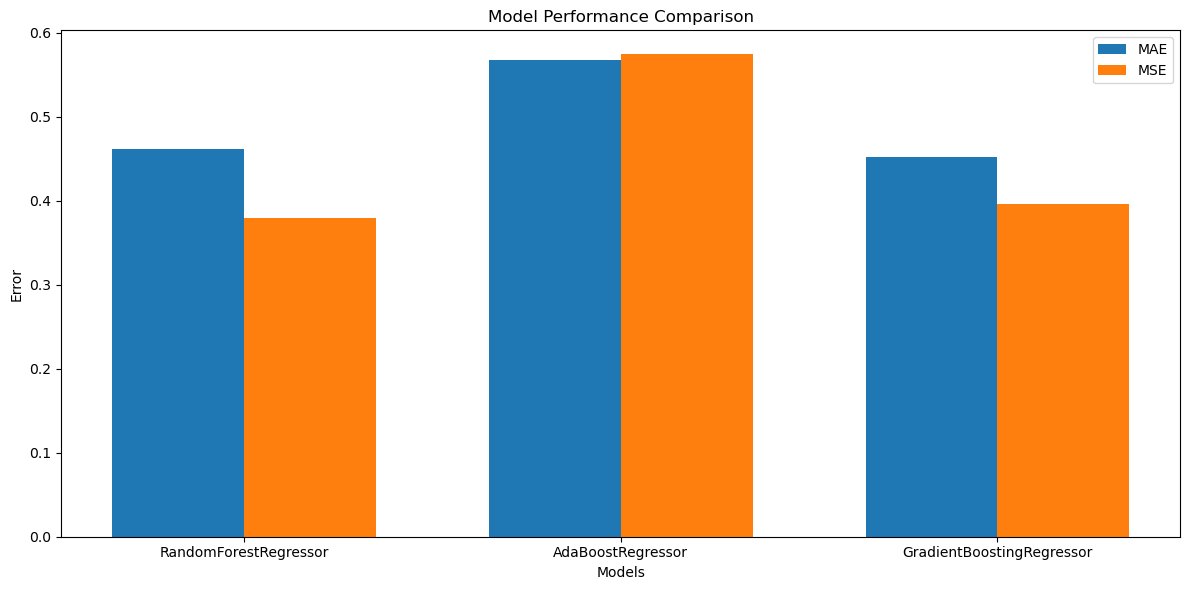

In [16]:
import matplotlib.pyplot as plt

def plot_model_performance(models, metrics):
    n_models = len(models)
    n_metrics = len(metrics)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    bar_width = 0.35
    index = np.arange(n_models)
    
    for i, metric in enumerate(metrics):
        values = [getattr(model, f'{metric}_')[-1] for model in models]
        ax.bar(index + i*bar_width, values, bar_width, label=metric.upper())
    
    ax.set_xlabel('Models')
    ax.set_ylabel('Error')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels([model.__class__.__name__ for model in models])
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Assuming you've already trained the models and calculated MAE and MSE
models = [rf_regressor, ada_regressor, gb_regressor]
metrics = ['mae', 'mse']

# Store the error metrics in the model objects
for model in models:
    y_pred = model.predict(X_val)
    model.mae_ = [mean_absolute_error(y_val, y_pred)]
    model.mse_ = [mean_squared_error(y_val, y_pred)]

# Plot the performance
plot_model_performance(models, metrics)